# Bias Variance Tradeoff

In this notebook we investigate the bias and variance of models. In the first section we'll investigate fitting functions of the form:

$$f(x) = a + b * x^n$$

to some cubic data with noise.

In [2]:
% matplotlib inline
import random

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from sklearn import datasets, linear_model

## Some helper functions
The following functions will generate data and polynomial values.

In [3]:
def polynomials(X, degree=1):
    array = [X]
    y = X
    for i in range(2, int(degree + 1)):
        y = y * X
        array.append(y)
    return np.array(array).transpose()

def monomials(X, degree=1):
    y = np.array(X)
    y = np.power(X, degree)
    return np.array([y]).transpose()

def generate_data(func, a, b, n=100):
    data = []
    for _ in range(n):
        x = random.random() * (b - a)
        y = func(x)
        data.append((x, y))
    return list(sorted(data))

In [5]:
X = np.array(range(10))
polynomials(X, 3)

array([[  0,   0,   0],
       [  1,   1,   1],
       [  2,   4,   8],
       [  3,   9,  27],
       [  4,  16,  64],
       [  5,  25, 125],
       [  6,  36, 216],
       [  7,  49, 343],
       [  8,  64, 512],
       [  9,  81, 729]])

In [4]:
mu, sigma = 0, 0.1 # mean and standard deviation
# norm = np.random.normal(mu, sigma)

# Generate some data
f = lambda x: 4 + 5 * x - 3 * x*x + 0.1 * x * x * x + np.random.normal(mu, sigma)
data = generate_data(f, 0, 2, n=20)

## Fitting Polynomial Functions

Here we fit try to fit our sample data with an increasing exponent:

$$f(x) = 1 + b x^n$$

None of these models are quite right because the data is generate from the function

$$ \hat{f}(x) = 4 + 5 x - 3 x^2 + 0.1 x^3$$

So each model is not quite right because one or more terms is missing. This will allow us to take a closer look at the bias-variance tradeoff.

Let's start with $n = 1, 2, 3, 4$.

('Coefficients: \n', array([-0.67262762]))
Variance score: 0.22
Residual sum of squares: 0.75
Bias: 0.570428125878
Variance: 0.165892599744


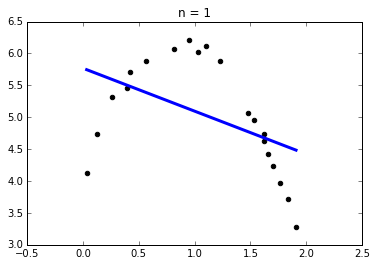

('Coefficients: \n', array([-0.45956845]))
Variance score: 0.43
Residual sum of squares: 0.75
Bias: 0.413832176679
Variance: 0.322488548944


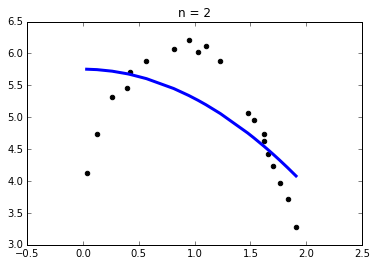

('Coefficients: \n', array([-0.28071769]))
Variance score: 0.56
Residual sum of squares: 0.75
Bias: 0.317064565996
Variance: 0.419256159627


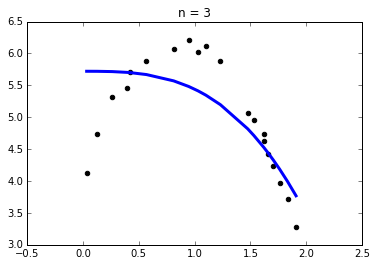

('Coefficients: \n', array([-0.16265549]))
Variance score: 0.64
Residual sum of squares: 0.75
Bias: 0.262098300178
Variance: 0.474222425444


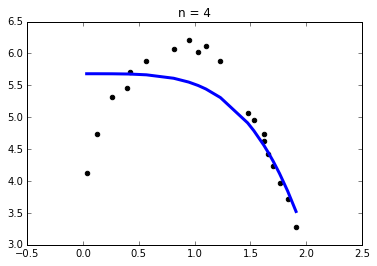

('Coefficients: \n', array([-0.09145056]))
Variance score: 0.67
Residual sum of squares: 0.75
Bias: 0.233629739929
Variance: 0.502690985693


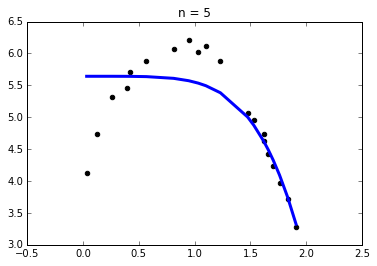

('Coefficients: \n', array([-0.05039059]))
Variance score: 0.69
Residual sum of squares: 0.75
Bias: 0.222217450472
Variance: 0.51410327515


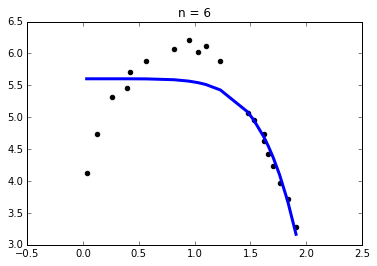

('Coefficients: \n', array([-0.0273568]))
Variance score: 0.69
Residual sum of squares: 0.75
Bias: 0.221984122186
Variance: 0.514336603437


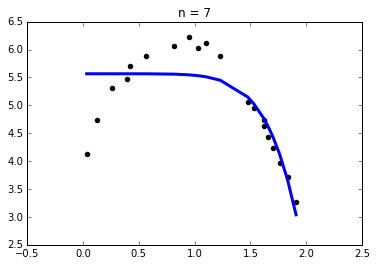

('Coefficients: \n', array([-0.01468372]))
Variance score: 0.68
Residual sum of squares: 0.75
Bias: 0.22904844882
Variance: 0.507272276803


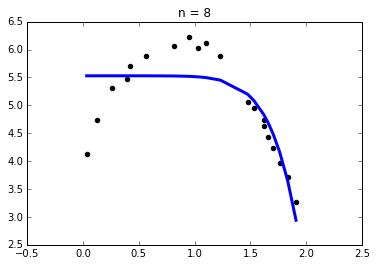

('Coefficients: \n', array([-0.00781231]))
Variance score: 0.66
Residual sum of squares: 0.75
Bias: 0.240732246818
Variance: 0.495588478804


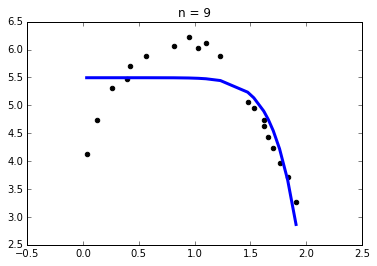

In [5]:
domain = np.array([x[0] for x in data])
Y = np.array([x[1] for x in data])

for i in range(1, 10):
    X = monomials(domain, i)
    # Create linear regression object
    regr = linear_model.LinearRegression()
    regr.fit(X, Y)

    yhat = regr.predict(X)
    sse = np.mean((np.mean(yhat) - Y) ** 2)
    var = np.var(yhat)
    bias = sse - var - 0.01
    
    # The coefficients
    print('Coefficients: \n', regr.coef_)
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % regr.score(X, Y))

    # The mean square error
    print("Residual sum of squares: %.2f" % sse)

    print("Bias: {bias}".format(bias=bias))
    print("Variance: {var}".format(var=var))
        
    # Plot outputs
    plt.scatter(domain, Y,  color='black')
    plt.plot(domain, regr.predict(X), color='blue', linewidth=3)

    plt.title("n = " + str(i))

    plt.show()

It's important to note that the true measures of bias and variance are averaged over many fits to many samples from the same data source, and we're only looking at one instance here. Notice that the bias is at first decreasing as the exponent increases, but at $n=6$ we see the bias start to increase while the squared errors are basically unchanged. Let's make a plot of the bias as the exponent increases.

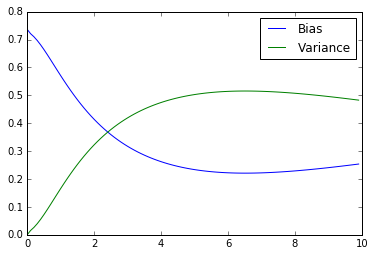

In [6]:
bs = []
vars = []
exps = np.arange(0, 10, 0.1)

for i in exps:
    X = monomials(domain, i)
    # Create linear regression object
    regr = linear_model.LinearRegression()
    regr.fit(X, Y)

    yhat = regr.predict(X)
    sse = np.mean((np.mean(yhat) - Y) ** 2)
    var = np.var(yhat)
    bias = sse - var - 0.01
    bs.append(bias)
    vars.append(var)

plt.plot(exps, bs, label="Bias")
plt.plot(exps, vars, label="Variance")
ax = plt.gca()

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

plt.show()

Just as in the conceptual diagram from the lesson, there's a spot where the bias is minimized around $n=5$.

# Variance

Now let's try to fit the full polynomial as the degree increases, which will help us visualize variance error.

**Check**: In the next code section, what changes when compared to the code above?

('Coefficients: \n', array([-0.67262762]))
Variance score: 0.22
Residual sum of squares: 0.75
Bias: 0.570428125878
Variance: 0.165892599744


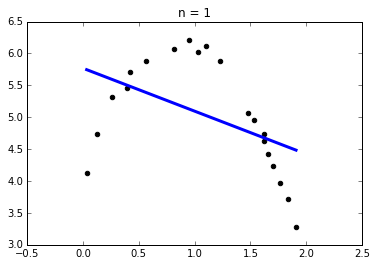

('Coefficients: \n', array([ 4.72013429, -2.71281623]))
Variance score: 0.99
Residual sum of squares: 0.75
Bias: -0.0031738215126
Variance: 0.739494547135


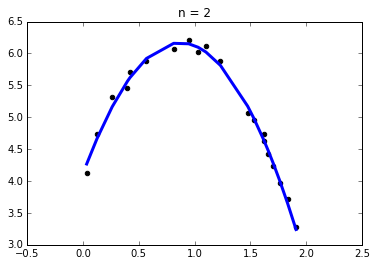

('Coefficients: \n', array([ 5.00444206, -3.08019124,  0.12546288]))
Variance score: 0.99
Residual sum of squares: 0.75
Bias: -0.00346776970878
Variance: 0.739788495331


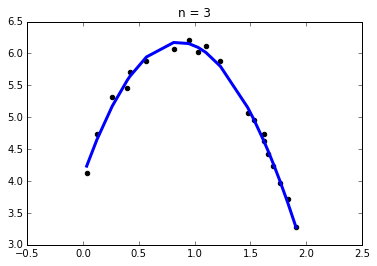

('Coefficients: \n', array([ 5.19773047, -3.53261567,  0.48556564, -0.09194374]))
Variance score: 0.99
Residual sum of squares: 0.75
Bias: -0.00351497123691
Variance: 0.739835696859


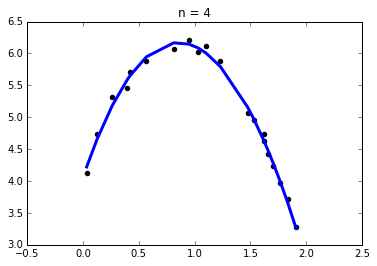

('Coefficients: \n', array([  7.55165421, -12.41524657,  12.74168984,  -7.11447898,   1.42269012]))
Variance score: 0.99
Residual sum of squares: 0.75
Bias: -0.00525921351786
Variance: 0.74157993914


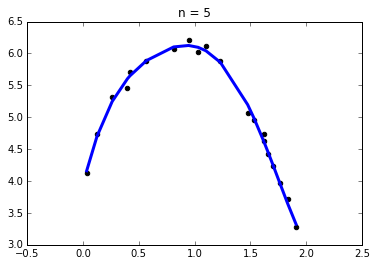

('Coefficients: \n', array([ 10.04112771, -25.19392485,  38.76939322, -31.99714857,
        12.60632309,  -1.90641448]))
Variance score: 0.99
Residual sum of squares: 0.75
Bias: -0.00609821361451
Variance: 0.742418939237


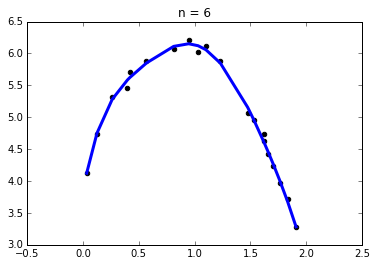

('Coefficients: \n', array([  9.54393247, -21.7343334 ,  28.84702631, -17.96525221,
         2.2492469 ,   1.92117047,  -0.5592714 ]))
Variance score: 0.99
Residual sum of squares: 0.75
Bias: -0.00611461161081
Variance: 0.742435337233


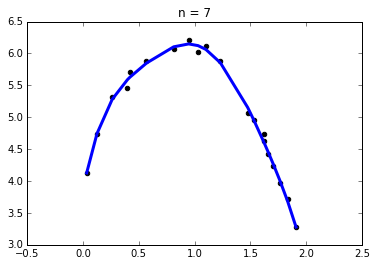

('Coefficients: \n', array([  9.10507053, -17.78942051,  13.95626912,  10.69160966,
       -28.27872113,  20.14361202,  -6.2653733 ,   0.72965649]))
Variance score: 0.99
Residual sum of squares: 0.75
Bias: -0.00611983963562
Variance: 0.742440565258


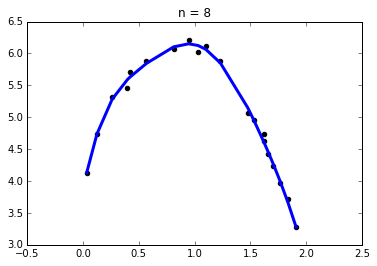

('Coefficients: \n', array([  10.56306793,  -33.55545882,   87.56752824, -170.37061689,
        228.83436512, -197.93716968,  102.72919673,  -28.87026822,
          3.36775775]))
Variance score: 0.99
Residual sum of squares: 0.75
Bias: -0.00614597837302
Variance: 0.742466703995


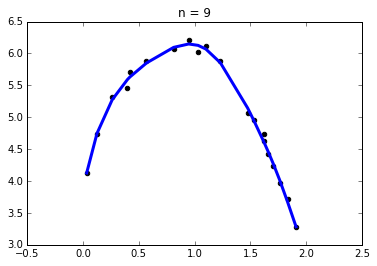

In [7]:
domain = np.array([x[0] for x in data])
Y = np.array([x[1] for x in data])

for i in range(1, 10):
    X = polynomials(domain, i)
    # Create linear regression object
    regr = linear_model.LinearRegression()
    regr.fit(X, Y)

    yhat = regr.predict(X)
    sse = np.mean((np.mean(yhat) - Y) ** 2)
    var = np.var(yhat)
    bias = sse - var - 0.01
    
    # The coefficients
    print('Coefficients: \n', regr.coef_)
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % regr.score(X, Y))

    # The mean square error
    print("Residual sum of squares: %.2f" % sse)

    print("Bias: {bias}".format(bias=bias))
    print("Variance: {var}".format(var=var))
        
    # Plot outputs
    plt.scatter(domain, Y,  color='black')
    plt.plot(domain, regr.predict(X), color='blue', linewidth=3)

    plt.title("n = " + str(i))

    plt.show()

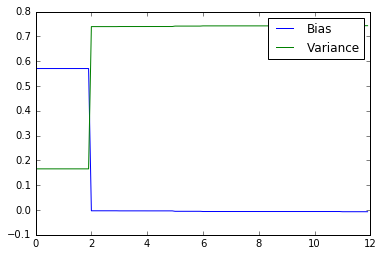

In [8]:
bs = []
vars = []
exps = np.arange(0, 12, .1)

for i in exps:
    X = polynomials(domain, i)
    # Create linear regression object
    regr = linear_model.LinearRegression()
    regr.fit(X, Y)

    yhat = regr.predict(X)
    sse = np.mean((np.mean(yhat) - Y) ** 2)
    var = np.var(yhat)
    bias = sse - var - 0.01
    bs.append(bias)
    vars.append(var)

plt.plot(exps, bs, label="Bias")
plt.plot(exps, vars, label="Variance")
ax = plt.gca()

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

plt.show()

Notice that the fits for $n = 2, 3, 4$ are pretty good. As the exponent increases, the best fit curve is overfitting the dataset, and the shape of the curve does not reflect what we know the underlying data to really look like. In this case we have error due to variance -- with too many parameters, our model is fitting the random variations in the data which we generally want to avoid.

# Guided Practice

We've seen that as the complexity in our models change so too do the bias and variance. Let's investigate from another angle using linear regression. Rather than change the model, we'll change the underlying data to be drawn from a higher dimensional model.

Your tasks are:
* Fill in the code to fit a linear regression to the data
* Investiage the bias and variance as the data source changes in complexity


In [28]:
random.seed(1000)
for degree in range(1, 7):
    # Generate some data
    f = lambda x: 1 - 2 * x + 3 * x ** degree + np.random.normal(mu, sigma)
    data = generate_data(f, 0, 2, n=20)

    domain = np.array([x[0] for x in data])
    Y = np.array([x[1] for x in data])

    X = np.array([domain]).transpose()
    regr = linear_model.LinearRegression()
    regr.fit(X,Y)
    
    yhat = regr.predict(X)
    sse = np.mean((np.mean(yhat) - Y) ** 2)
    var = np.var(yhat)
    bias = sse - var - 0.01
#     plt.scatter(domain, Y,  color='black')
#     plt.plot(domain, regr.predict(X), color='blue', linewidth=3)

    # Compute the errors

    # Plot outputs


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


# Individual Exercises

Some functions, like $sin$ and $exp$ can be better fit with increasing large polynomials.

* By modifying the above code, fit polynomials of degree $n$ as $n$ ranges from 1 to 10 to $sin$ on the interval $[0, 2 \pi]$.
* Can you explain why the bias and variance continue to decrease as $n$ gets large?

In [9]:
import math
f = lambda x: math.sin(x) + np.random.normal(mu, sigma)
data = generate_data(f, 0, 2*3.14, n=100)

domain = np.array([x[0] for x in data])
Y = np.array([x[1] for x in data])

for i in range(1, 10):
    pass
    # Fit a polynomial of degree i to the data
    
    # Compute the errors

    # Plot outputs


### Repeat the same exercise with the function

$$ y = e^x $$

You should again find that larger polynomials fit the data better.

### A bad model for the exponential

To see a model with high variance, try fitting the model:

```
y = a sin(x) + b cos(x)
```

to `y = e^x`. Does this model have more bias or variance?